In [14]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Carregando o dataset Iris
iris = sns.load_dataset('iris')

Features
       species  sepal_length  sepal_width  petal_length  petal_width
0      setosa         5.006        3.428         1.462        0.246
1  versicolor         5.936        2.770         4.260        1.326
2   virginica         6.588        2.974         5.552        2.026


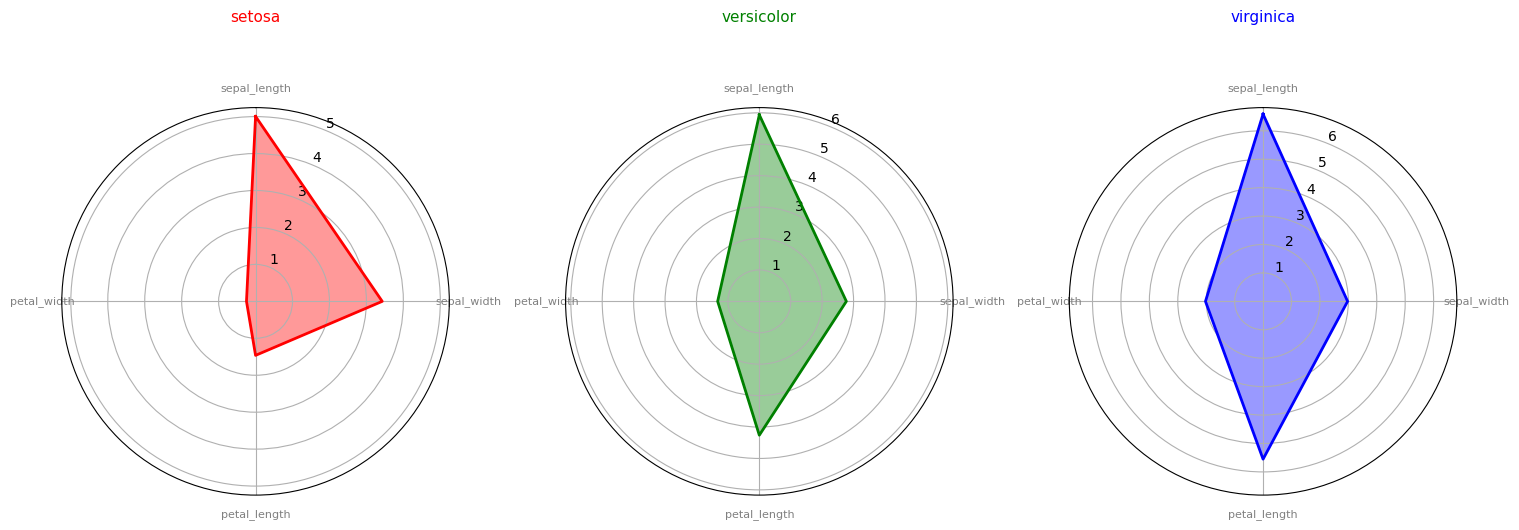

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# Carregando o dataset Iris
iris = sns.load_dataset('iris')

# Calculando as médias das características para cada espécie
mean_features = iris.groupby('species').mean().reset_index()
print("Features\n", mean_features)

# Função para criar um gráfico de radar
def make_spider(row, title, color):
    categories = list(mean_features)[1:]  # Exclui a coluna 'species'
    N = len(categories)
    
    angles = [n / float(N) * 2 * np.pi for n in range(N)]
    angles += angles[:1]  # Completa o círculo adicionando o primeiro ponto no final
    
    ax = plt.subplot(1, 3, row+1, polar=True)
    ax.set_theta_offset(np.pi / 2)
    ax.set_theta_direction(-1)
    
    plt.xticks(angles[:-1], categories, color='grey', size=8)  # Ajuste o tamanho e a cor aqui
    
    values = mean_features.loc[row].drop('species').values.flatten().tolist()
    values += values[:1]
    ax.plot(angles, values, color=color, linewidth=2, linestyle='solid')
    ax.fill(angles, values, color=color, alpha=0.4)
    
    plt.title(title, size=11, color=color, y=1.2)  # Ajuste a posição do título

# Aumentando o tamanho da figura e ajustando a margem
plt.figure(figsize=(18, 6))  # Tamanho maior
colors = ['r', 'g', 'b']
for i in range(3):
    make_spider(i, mean_features['species'][i], colors[i])

plt.subplots_adjust(hspace=0.5, wspace=0.3)  # Ajustando o espaçamento
plt.show()
